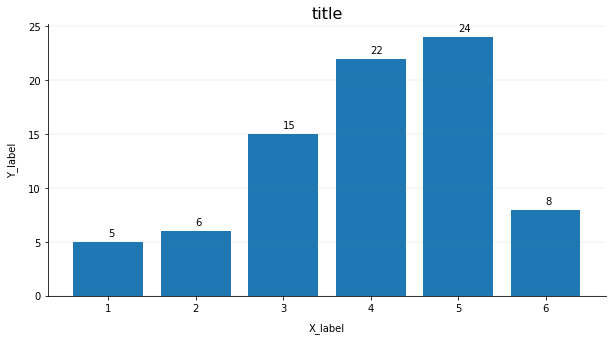

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df1 = pd.DataFrame({'X':['1', '2', '3', '4', '5', '6'],
                    'Y': [5, 6, 15, 22, 24, 8]})


fig, ax = plt.subplots(figsize=(10,5))

plt.bar('X', 'Y', data = df1, edgecolor=None)


# font setting
font = {'fontsize':16,
        'fontweight' : 20,
        'family': 'DejaVu Sans',          # font family, default is DejaVu Sans
        'verticalalignment': 'center',    # 'top', 'bottom', 'center', 'baseline'
        'horizontalalignment': 'center'}  # 'center', 'right', 'left'

# title
plt.title("title", font, loc='center', pad=10)


# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', labelpad=10)
plt.ylabel('Y_label', labelpad=10)

# removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# background grid setting
ax.yaxis.grid(color ='grey', linewidth=0.2, alpha=0.6) # alpha: soft color


# present number on graph
for x, v in enumerate(list(df1['X'].values)):
    plt.text(x, df1['Y'].values.tolist()[x]+0.5, str(df1['Y'].values.tolist()[x]), color='black')


plt.show()

# group data

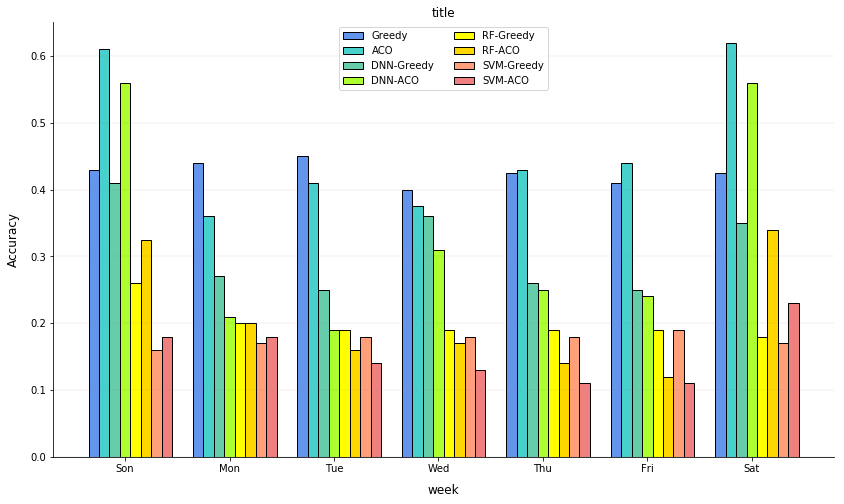

In [25]:
df2 = pd.DataFrame({'week':["Son","Mon","Tue","Wed","Thu","Fri","Sat"],
                'Greedy':[0.43, 0.44, 0.45, 0.4, 0.425, 0.41,0.425],
                'ACO' :[0.61, 0.36, 0.41, 0.375, 0.43, 0.44, 0.62],
                'DNN-Greedy':[0.41, 0.27, 0.25, 0.36, 0.26, 0.25, 0.35],
                'DNN-ACO':[0.56, 0.21, 0.19, 0.31, 0.25, 0.24, 0.56],
                'RF-Greedy':[0.26, 0.2, 0.19, 0.19, 0.19, 0.19, 0.18],
                'RF-ACO':[0.325, 0.2, 0.16, 0.17, 0.14, 0.12, 0.34],
                'SVM-Greedy':[0.16, 0.17, 0.18, 0.18, 0.18, 0.19, 0.17],
                'SVM-ACO':[0.18, 0.18, 0.14, 0.13, 0.11, 0.11, 0.23]})


barWidth = 0.1

# set location of bar on x axis
r1 = np.arange(len(df2['week'].values.tolist()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

fig, ax = plt.subplots(figsize=(14,8))

# make plot
plt.bar(r1, df2['Greedy'].values.tolist(), color='cornflowerblue', width=barWidth, edgecolor='black', label='Greedy')
plt.bar(r2, df2['ACO'].values.tolist(), color='mediumturquoise', width=barWidth, edgecolor='black', label='ACO')
plt.bar(r3, df2['DNN-Greedy'].values.tolist(), color='mediumaquamarine', width=barWidth, edgecolor='black', label='DNN-Greedy')
plt.bar(r4, df2['DNN-ACO'].values.tolist(), color='greenyellow', width=barWidth, edgecolor='black', label='DNN-ACO')
plt.bar(r5, df2['RF-Greedy'].values.tolist(), color='yellow', width=barWidth, edgecolor='black', label='RF-Greedy')
plt.bar(r6, df2['RF-ACO'].values.tolist(), color='gold', width=barWidth, edgecolor='black', label='RF-ACO')
plt.bar(r7, df2['SVM-Greedy'].values.tolist(), color='lightsalmon', width=barWidth, edgecolor='black', label='SVM-Greedy')
plt.bar(r8, df2['SVM-ACO'].values.tolist(), color='lightcoral', width=barWidth, edgecolor='black', label='SVM-ACO')

# title
plt.title("title", fontsize=12, family='DejaVu Sans', loc='center', pad=5)


# label setting
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('week', fontsize = 12, labelpad=10)
plt.ylabel('Accuracy', fontsize = 12, labelpad=10)


# adjust location of xticks label
plt.xticks([x + 0.2 + barWidth for x in range(len(df2['week'].values.tolist()))], df2['week'].values.tolist())


# removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# background grid setting
ax.yaxis.grid(color ='grey', linewidth=0.2, alpha=0.6) # alpha: soft color


# legend
plt.legend(ncol=2)
plt.show()